In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Add a channel dimension
x_test = np.expand_dims(x_test, axis=-1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the CNN model with ResNet-like skip connection
def create_model():
    inputs = layers.Input(shape=(28, 28, 1))

    # First Convolutional Layer
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)

    # Second Convolutional Layer + Skip connection (ResNet style)
    x_shortcut = x  # Save the input for skip connection
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Skip connection
    x = layers.add([x, x_shortcut])  # Adding shortcut (residual connection)

    # MaxPooling layer
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten and fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Output layer
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# Create the model
model = create_model()

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 177s 185ms/step - accuracy: 0.9399 - loss: 0.2005 - val_accuracy: 0.9839 - val_loss: 0.0473
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 196s 179ms/step - accuracy: 0.9896 - loss: 0.0353 - val_accuracy: 0.9855 - val_loss: 0.0432
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 202s 179ms/step - accuracy: 0.9949 - loss: 0.0180 - val_accuracy: 0.9806 - val_loss: 0.0591
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 168s 180ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.9844 - val_loss: 0.0523
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 207s 186ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9763 - val_loss: 0.0707


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 173s 185ms/step - accuracy: 0.9976 - loss: 0.0089 - val_accuracy: 0.9855 - val_loss: 0.0542
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 170s 181ms/step - accuracy: 0.9975 - loss: 0.0069 - val_accuracy: 0.9876 - val_loss: 0.0448
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 200s 179ms/step - accuracy: 0.9981 - loss: 0.0062 - val_accuracy: 0.9839 - val_loss: 0.0584
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 206s 183ms/step - accuracy: 0.9981 - loss: 0.0055 - val_accuracy: 0.9880 - val_loss: 0.0438
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 173s 184ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9881 - val_loss: 0.0454


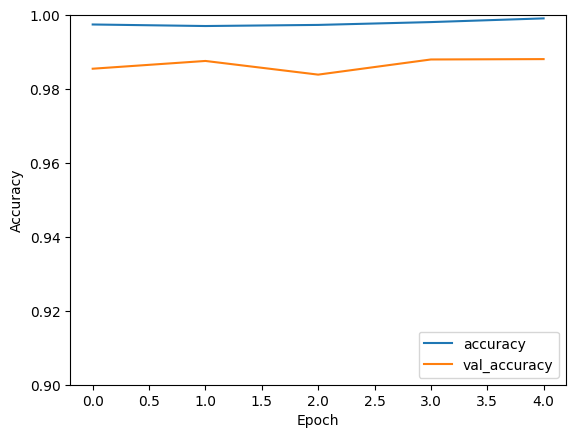

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Optional: Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9,1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.9881


In [ ]:
# Predict and calculate precision, recall, and F1 score
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



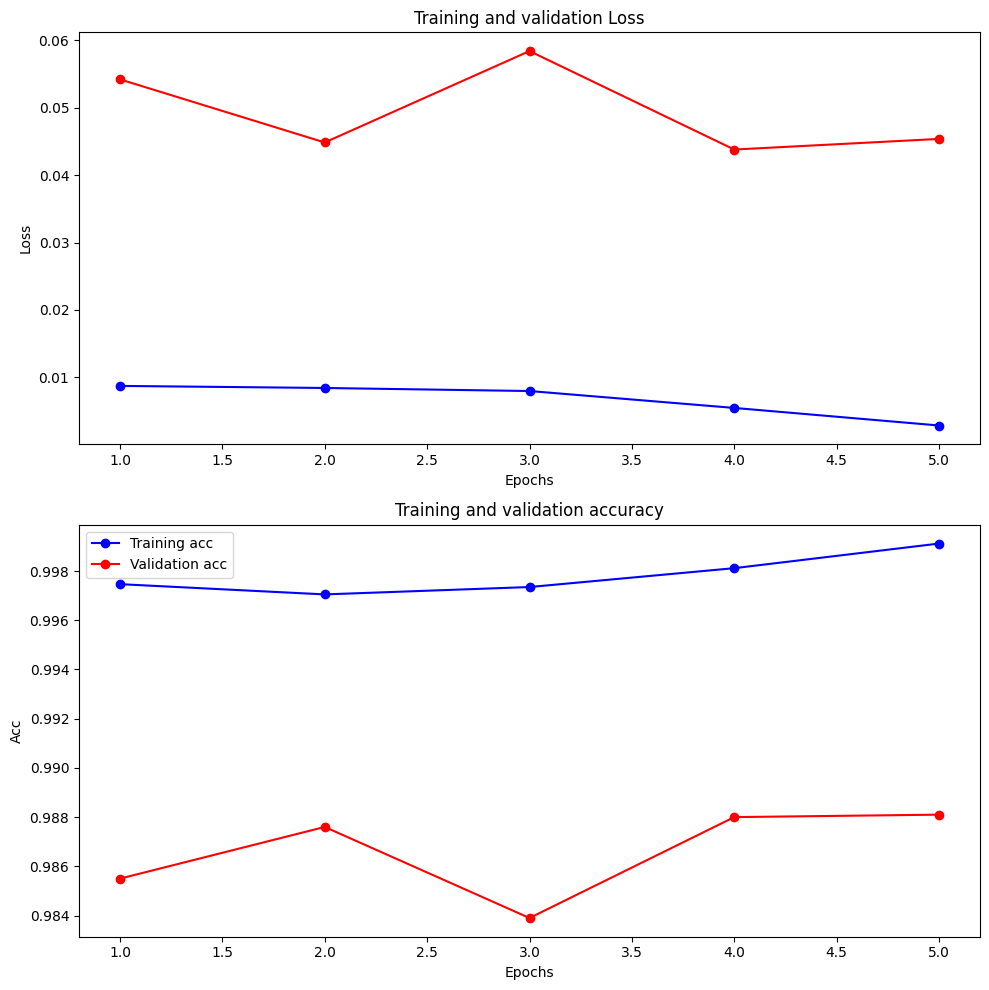

In [ ]:
# History
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Loss
epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'b-o', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'r-o', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Accuracy
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'b-o', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'r-o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.tight_layout()
plt.show()

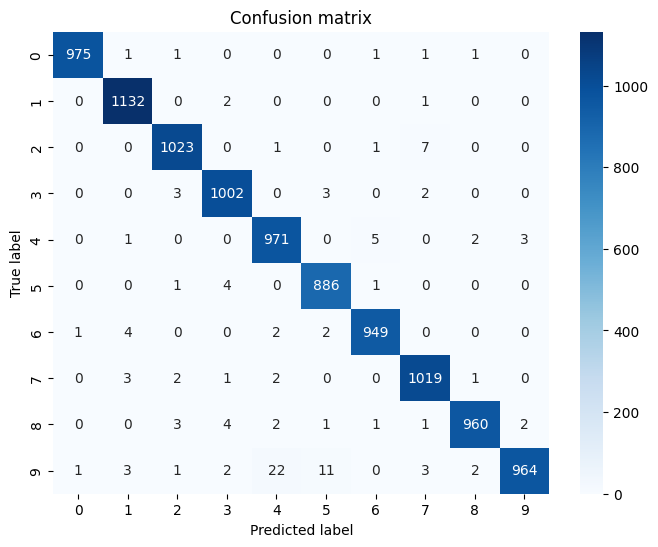

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred) # This line was missing, calculating and assigning to cm

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
# Display trainable parameters
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ add[0][0]         │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 6272)      │          0 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    802,944 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │      1,290 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,442,944 (9.32 MB)

 Trainable params: 814,186 (3.11 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 1,628,374 (6.21 MB)